# HW2 - Problem2

In this problem you will implement the naive Bayes classifier derived in Problem 1, as well as the k-NN algorithm and logistic regression algorithm.  The data consists of examples of spam and non-spamemails, of which there are 4600 labeled examples.  The feature vectorxis a 54-dimensional vector ex-tracted from the email and y= 1indicates a spam email.

## 1. Naive Bayes
In every experiment below,randomly partition the data into 10 groups and run the algorithm 10 different times so that each group is held out as a test set one time.   The final result you show should be the cumulative result across these 10 groups.

Import Data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('X.csv', header = None)
y = pd.read_csv('y.csv', header = None)

In [3]:
X_y_combined = pd.concat([X, y], axis=1, sort=False)
shuffled_data = X_y_combined.sample(frac=1)

In [4]:
data1 = shuffled_data.iloc[0:460,:]
data2 = shuffled_data.iloc[460:920,:]
data3 = shuffled_data.iloc[920:1380,:]
data4 = shuffled_data.iloc[1380:1840,:]
data5 = shuffled_data.iloc[1840:2300,:]
data6 = shuffled_data.iloc[2300:2760,:]
data7 = shuffled_data.iloc[2760:3220,:]
data8 = shuffled_data.iloc[3220:3680,:]
data9 = shuffled_data.iloc[3680:4140,:]
data10 = shuffled_data.iloc[4140:4600,:]

In [5]:
def train_sepratedby_class(data):
    
    train_1 = data[data.iloc[:,-1]==1]
    train_0 = data[data.iloc[:,-1]==0]
    
    X_train_1 = train_1.iloc[:,0:54]
    y_train_1 = train_1.iloc[:,-1]
    X_train_0 = train_0.iloc[:,0:54]
    y_train_0 = train_0.iloc[:,-1]
    
    return X_train_1, y_train_1, X_train_0, y_train_0

In [6]:
#1-9 V.S. 10
result1 = data1.append([data2, data3, data4, data5, data6, data7, data8, data9])
X_train_1 = result1.iloc[:,0:54]
y_train_1 = result1.iloc[:,-1]
X_train_1_1, y_train_1_1, X_train_0_1, y_train_0_1 = train_sepratedby_class(result1)
X_test_1 = data10.iloc[:,0:54]
y_test_1 = data10.iloc[:,-1]
X_train = result1.iloc[:,0:54]
y_train = result1.iloc[:,-1]
X_train_1,y_train_1,X_train_0,y_train_0= X_train_1_1,y_train_1_1,X_train_0_1,y_train_0_1
X_test = X_test_1 
y_test = y_test_1

#1-8,10, V.S. 9
result2 = data1.append([data2, data3, data4, data5, data6, data7, data8, data10])
X_train_2 = result2.iloc[:,0:54]
y_train_2 = result2.iloc[:,-1]
X_train_1_2, y_train_1_2, X_train_0_2, y_train_0_2 = train_sepratedby_class(result2)
X_test_2 = data9.iloc[:,0:54]
y_test_2 = data9.iloc[:,-1]

#8
result3 = data1.append([data2, data3, data4, data5, data6, data7, data9, data10])
X_train_3 = result3.iloc[:,0:54]
y_train_3 = result3.iloc[:,-1]
X_train_1_3, y_train_1_3, X_train_0_3, y_train_0_3 = train_sepratedby_class(result3)
X_test_3 = data8.iloc[:,0:54]
y_test_3 = data8.iloc[:,-1]

#7
result4 = data1.append([data2, data3, data4, data5, data6, data8, data9, data10])
X_train_4 = result4.iloc[:,0:54]
y_train_4 = result4.iloc[:,-1]
X_train_1_4, y_train_1_4, X_train_0_4, y_train_0_4 = train_sepratedby_class(result4)
X_test_4 = data7.iloc[:,0:54]
y_test_4 = data7.iloc[:,-1]

#6
result5 = data1.append([data2, data3, data4, data5, data7, data8, data9, data10])
X_train_5 = result5.iloc[:,0:54]
y_train_5 = result5.iloc[:,-1]
X_train_1_5, y_train_1_5, X_train_0_5, y_train_0_5 = train_sepratedby_class(result5)
X_test_5 = data6.iloc[:,0:54]
y_test_5 = data6.iloc[:,-1]

#5
result6 = data1.append([data2, data3, data4, data6, data7, data8, data9, data10])
X_train_6 = result6.iloc[:,0:54]
y_train_6 = result6.iloc[:,-1]
X_train_1_6, y_train_1_6, X_train_0_6, y_train_0_6 = train_sepratedby_class(result6)
X_test_6 = data5.iloc[:,0:54]
y_test_6 = data5.iloc[:,-1]

#4
result7 = data1.append([data2, data3, data5, data6, data7, data8, data9, data10])
X_train_7 = result7.iloc[:,0:54]
y_train_7 = result7.iloc[:,-1]
X_train_1_7, y_train_1_7, X_train_0_7, y_train_0_7 = train_sepratedby_class(result7)
X_test_7 = data4.iloc[:,0:54]
y_test_7 = data4.iloc[:,-1]

#3
result8 = data1.append([data2, data4, data5, data6, data7, data8, data9, data10])
X_train_8 = result8.iloc[:,0:54]
y_train_8 = result8.iloc[:,-1]
X_train_1_8, y_train_1_8, X_train_0_8, y_train_0_8 = train_sepratedby_class(result8)
X_test_8 = data3.iloc[:,0:54]
y_test_8 = data3.iloc[:,-1]

#2
result9 = data1.append([data3, data4, data5, data6, data7, data8, data9, data10])
X_train_9 = result9.iloc[:,0:54]
y_train_9 = result9.iloc[:,-1]
X_train_1_9, y_train_1_9, X_train_0_9, y_train_0_9 = train_sepratedby_class(result9)
X_test_9 = data2.iloc[:,0:54]
y_test_9 = data2.iloc[:,-1]

#1
result10 = data2.append([data3, data4, data5, data6, data7, data8, data9, data10])
X_train_10 = result10.iloc[:,0:54]
y_train_10 = result10.iloc[:,-1]
X_train_1_10, y_train_1_10, X_train_0_10, y_train_0_10=train_sepratedby_class(result10)
X_test_10 = data1.iloc[:,0:54]
y_test_10 = data1.iloc[:,-1]

## Question(a) Naive Bayes

(a)  Implement the naive Bayes classifier described above. In a 2×2 table, write the number of times that you predicted a class y data point (ground truth) as a class y data point (model prediction) in the (y,y′)-th cell of the table, where y and y′can be either 0 or 1.  There should be four values written in the table in your PDF. Next to your table, write the prediction accuracy—the sum of the diagonal divided by 4600. (The sum of all entries in the table should be 4600.)

Caculate $\pi_{0}$, $\pi_{1}$,$\lambda_{0}$,$\lambda_{1}$ first

In [7]:
def calculate_lambda(data):
    """
    Return a list containg calculated lambda
    data: pandas dataframe
    """
    lst = []
    indice_list = np.arange(data.shape[1])
    for i in indice_list:
        acc = (1+sum(data[i]))/(1+len(data))
        lst.append(acc)
    return lst

Calcualte $\lambda_{0}$ and $\lambda_{1}$ for 54 features (i = 0...53)

Make prediction for test data

In [8]:
def get_classprob_onerow(onerow,lambda_list, pi):
    """
    Return the predicted class probability(0 or 1) for particular row.
    onerow: a particular row
    lambda_list: lambda_0_list or lambda_1_list, depends on which class 
    probability will be predicted
    pi: pi_0 or pi_1
    """
    i=0
    lst = []
    for lambda_temp in lambda_list:
        row_array = onerow.values
        #part1 = math.pow(lambda_list[i],row_array[i])
        part1 = float(lambda_list[i]**row_array[i])
        part2 = math.pow(math.e, -lambda_list[i])
        #part3 = math.factorial(row_array[i])
        poisson_prob = part1*part2#/part3 #poisson prob for one feature
        lst.append(poisson_prob)
        i+=1
        result = np.prod(np.array(lst))*pi #class prob = P(Y=y)*joint poisson prob
    return result

In [26]:
def allrow_class_prob(data, ytrain, lambda_1_list, lambda_0_list, pi):
    """
    Return two lists: list 'class1' consists of each row's probabiliy of 
    belonging to class1; (len(class1) = the size of data)
    list 'class2' consists of each row's probability of beloning to class2
    data: the data set will be predicted, e.g.: X_test
    """
    class1 = []
    class0 = []
    pi_1 = np.mean(ytrain)
    pi_0 = 1-pi_1
    row_indice = np.arange(len(data))
    for j in row_indice:
        class1_prob = get_classprob_onerow(data.iloc[j],lambda_1_list, pi_1)
        class1.append(class1_prob)
        class0_prob = get_classprob_onerow(data.iloc[j],lambda_0_list, pi_0)
        class0.append(class0_prob)
    return class1, class0

In [17]:
def pred_result(problist1, problist2):
    """
    Return a list of predicted result(1 or 0)
    problist1: list of class probability 
    """
    result = []
    indice_list = np.arange(len(problist1))
    for i in indice_list:
        if problist1[i] >= problist2[i]:
            result.append(1)
        else:
            result.append(0)
        i += 1
    return result

In [18]:
def cal_confusion_matrix(pred_list, true_list):
    """
    Return confusion matrix entries
    """
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    indice_list = np.arange(len(pred_list))
    for i in indice_list:
        if pred_list[i]==1 and true_list[i]==1:
            TP += 1
        elif pred_list[i]==0 and true_list[i]==1:
            FN += 1
        elif pred_list[i]==1 and true_list[i]==0:
            FP += 1
        elif pred_list[i]==0 and true_list[i]==0:
            TN += 1
    return TP, FN, FP, TN

10 Cross Validation

In [29]:
def Bayes_Confusion(data_result, ytrain, X_train_1, X_train_0, X_test, y_test):
    y_train = data_result.iloc[:,-1]
    pi_1 = np.mean(y_train)
    pi_0 = 1-pi_1
    lambda_1_list = calculate_lambda(X_train_1)
    lambda_0_list = calculate_lambda(X_train_0)

    class1, class0 = allrow_class_prob(X_test, ytrain, lambda_1_list,
                                       lambda_0_list,pi_1)

    pred_y = pred_result(class1, class0)
    true_y = y_test.values.tolist()

    TP, FN, FP, TN = cal_confusion_matrix(pred_y, true_y)
    return TP,FN,FP, TN

In [50]:
TP1, FN1, FP1, TN1 = Bayes_Confusion(result1, y_train, X_train_1, 
                                     X_train_0, X_test, y_test)
TP1, FN1, FP1, TN1

(170, 11, 46, 233)

In [51]:
TP2, FN2, FP2, TN2 = Bayes_Confusion(result2, y_train_2, X_train_1_2, 
                                     X_train_0_2, X_test_2, y_test_2)
TP2, FN2, FP2, TN2

(160, 11, 42, 247)

In [52]:
TP3, FN3, FP3, TN3 = Bayes_Confusion(result3, y_train_3, X_train_1_3, 
                                     X_train_0_3, X_test_3, y_test_3)
TP3, FN3, FP3, TN3

/Users/zechen/anaconda2/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


(168, 10, 46, 236)

In [53]:
TP4, FN4, FP4, TN4 = Bayes_Confusion(result4, y_train_4, X_train_1_4, 
                                     X_train_0_4, X_test_4, y_test_4)
TP4, FN4, FP4, TN4

(159, 6, 51, 244)

In [54]:
TP5, FN5, FP5, TN5 = Bayes_Confusion(result5, y_train_5, X_train_1_5, 
                                     X_train_0_5, X_test_5, y_test_5)
TP5, FN5, FP5, TN5

(186, 8, 49, 217)

In [55]:
TP6, FN6, FP6, TN6 = Bayes_Confusion(result6, y_train_6, X_train_1_6, 
                                     X_train_0_6, X_test_6, y_test_6)
TP6, FN6, FP6, TN6

(176, 6, 50, 228)

In [56]:
TP7, FN7, FP7, TN7 = Bayes_Confusion(result7, y_train_7, X_train_1_7, 
                                     X_train_0_7, X_test_7, y_test_7)
TP7, FN7, FP7, TN7

(174, 4, 54, 228)

In [57]:
TP8, FN8, FP8, TN8 = Bayes_Confusion(result8, y_train_8, X_train_1_8, 
                                     X_train_0_8, X_test_8, y_test_8)
TP8, FN8, FP8, TN8

/Users/zechen/anaconda2/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


(164, 14, 61, 221)

In [58]:
TP9, FN9, FP9, TN9 = Bayes_Confusion(result9, y_train_9, X_train_1_9, 
                                     X_train_0_9, X_test_9, y_test_9)
TP9, FN9, FP9, TN9

/Users/zechen/anaconda2/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


(180, 13, 49, 218)

In [94]:
TP10, FN10, FP10, TN10 = Bayes_Confusion(result10, y_train_10, X_train_1_10, 
                                         X_train_0_10, X_test_10, y_test_10)
TP10, FN10, FP10, TN10

(175, 18, 42, 225)

In [60]:
total_TP = TP1 + TP2 + TP3 + TP4 + TP5 + TP6 + TP7 + TP8 + TP9 + TP10  
total_FN = FN1 + FN2 + FN3 + FN4 + FN5 + FN6 + FN7 + FN8 + FN9 + FN10
total_FP = FP1 + FP2 + FP3 + FP4 + FP5 + FP6 + FP7 + FP8 + FP9 + FP10
total_TN = TN1 + TN2 + TN3 + TN4 + TN5 + TN6 + TN7 + TN8 + TN9 + TN10 
total = total_TP+total_FN+total_FP+total_TN
assert total==4600

In [61]:
total_TP,total_FN,total_FP,total_TN

(1712, 101, 490, 2297)

In [62]:
from IPython.display import display
data = [('TP: 1714', 'FP: 495'),('FN: 99', 'TN: 2292')]
df = pd.DataFrame(data)
df = df.rename({0: 'Predicted Postive', 1: 'Predicted Negative'},axis='index')
df = df.rename({0: 'Actual Postive', 1: 'Actual Negative'}, axis='columns')
display(df)

,Actual Postive,Actual Negative
Predicted Postive,TP: 1714,FP: 495
Predicted Negative,FN: 99,TN: 2292


In [63]:
accuracy = (total_TP+total_TN)/(total_TP+total_FN+total_FP+total_TN)
accuracy
print("Accuracy of Naive Bayes Classifier: {}".format(accuracy))

Accuracy of Naive Bayes Classifier: 0.8715217391304347


## Question (b) Plot $\lambda$

In one figure, show a stem plot (stem()in Matlab) of the 54 Poisson parameters for each class averaged across the 10 runs.  (This average is only used for plotting purposes on this homework.In practice you would relearn these parameters using the entire data set to find their final values.)Use the README file to make an observation about dimensions 16 and 52.

In [64]:
lambda_1_list_1 = calculate_lambda(X_train_1)
lambda_0_list_1 = calculate_lambda(X_train_0)

lambda_1_list_2 = calculate_lambda(X_train_1_2)
lambda_0_list_2 = calculate_lambda(X_train_0_2)

lambda_1_list_3 = calculate_lambda(X_train_1_3)
lambda_0_list_3 = calculate_lambda(X_train_0_3)

lambda_1_list_4 = calculate_lambda(X_train_1_4)
lambda_0_list_4 = calculate_lambda(X_train_0_4)

lambda_1_list_5 = calculate_lambda(X_train_1_5)
lambda_0_list_5 = calculate_lambda(X_train_0_5)

lambda_1_list_6 = calculate_lambda(X_train_1_6)
lambda_0_list_6 = calculate_lambda(X_train_0_6)

lambda_1_list_7 = calculate_lambda(X_train_1_7)
lambda_0_list_7 = calculate_lambda(X_train_0_7)

lambda_1_list_8 = calculate_lambda(X_train_1_8)
lambda_0_list_8 = calculate_lambda(X_train_0_8)

lambda_1_list_9 = calculate_lambda(X_train_1_9)
lambda_0_list_9 = calculate_lambda(X_train_0_9)

lambda_1_list_10 = calculate_lambda(X_train_1_10)
lambda_0_list_10 = calculate_lambda(X_train_0_10)

In [65]:
#average lambda across 10 cross validation
lambda1_lst = []
lambda0_lst = []
indice = np.arange(54)
for i in indice:
        lambda1 = (lambda_1_list_1[i]+lambda_1_list_2[i]+lambda_1_list_3[i]+
                   lambda_1_list_4[i] + lambda_1_list_5[i]+lambda_1_list_6[i]+
                   lambda_1_list_7[i]+lambda_1_list_8[i]+
                   lambda_1_list_9[i]+lambda_1_list_10[i])/10
        lambda1_lst.append(lambda1)
        lambda0 = (lambda_0_list_1[i]+lambda_0_list_2[i]+lambda_0_list_3[i]+
                   lambda_0_list_4[i] + lambda_0_list_5[i]+lambda_0_list_6[i]+
                   lambda_0_list_7[i]+lambda_0_list_8[i]+
                   lambda_0_list_9[i]+lambda_0_list_10[i])/10
        lambda0_lst.append(lambda0)

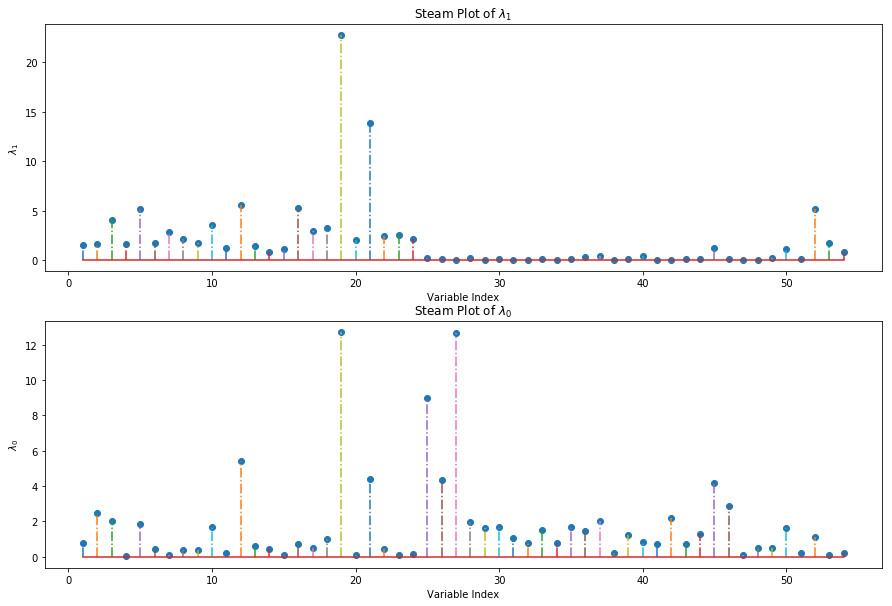

In [66]:
x = np.arange(1,55,1)

fig, ax = plt.subplots(2, 1 ,figsize=(15,10))
markerline, stemlines, baseline = ax[0].stem(x, lambda1_lst, '-.')
#ax[0].setp(baseline, color='r', linewidth=3)
ax[0].set_xlabel('Variable Index')
ax[0].set_ylabel('$\lambda_1$')
ax[0].set_title('Steam Plot of $\lambda_1$')

markerline, stemlines, baseline = ax[1].stem(x, lambda0_lst, '-.')
ax[1].set_xlabel('Variable Index')
ax[1].set_ylabel('$\lambda_0$')
ax[1].set_title('Steam Plot of $\lambda_0$')
plt.show()

In [86]:
lambda1_lst[15]

5.213598441636

In [87]:
lambda0_lst[15]

0.7396354454800711

In [88]:
lambda1_lst[51]

5.129235958660057

In [89]:
lambda0_lst[51]

1.095979061080689

In [92]:
5.213598441636/0.7396354454800711

7.0488758664777595

In [93]:
5.129235958660057/1.095979061080689

4.680049227950011

## Explanation:

feature 16: free; feature 52: !

- If an email contains word 'free', its probability of being a spam email is approxiamtly 7 times larger compared with email that doesn't contain 'free'.
- If an email contains word '!', its probability of being a spam email is approxiamtly 5 times larger compared with email that doesn't contain '!'.

## Question (c) KNN

(c)  Implement the k-NN classifier for k= 1 ,..., 20.  Use the l1 distance for this problem.  Plot the prediction accuracy as a function of k.

l1 distance: $\sum_{i=1}^n|y_i-x_i|$

procedures: use function 'pred_class' to calculate predicted class for ith row in test data. Then use function 'get_pred_list' to get predicted class for all data in test data. Finally, use 'KNN_1to20_accuracy' to calculate corresponding accuracy for K = 1,...,20

In [67]:
def pred_class(Xtest, Xtrain, ytrain, ith_testrow:int, K:int):
    """
    Return predict result for ith_testrow using KNN (return 0 or 1)
    """
    
    indices_lst1 = np.arange(Xtrain.shape[0])  #[0,2...4139]
    #test0 = Xtest.iloc[ith_testrow].tolist()
    #Calculate distance row by row
    #for n in indices_lst1:
        
    numSamples = Xtrain.shape[0]
    #calculate l1 distance
    diff = abs(np.tile(Xtest.iloc[ith_testrow], (numSamples, 1)) - Xtrain.values)
    lst = np.sum(diff, axis=1)
    l1_data = pd.DataFrame(
                {'l1_distance': lst,
                 'class_label': ytrain,
                })
        
    sort_l1data = l1_data.sort_values(by=['l1_distance'])
    select_data = sort_l1data.head(K)
    if sum(select_data['class_label']) > K/2:
        return 1
    elif sum(select_data['class_label']) < K/2:
        return 0    
    else:
        rand = np.random.randint(2)  #tie: randomly choose 0 or 1
        return rand

In [68]:
def get_pred_list(Xtest, Xtrain, ytrain, K:int):
    """
    Return predict list using KNN(choose K) for all data
    """
    in_lst = np.arange(Xtest.shape[0])
    pred_prob = []
    for i in in_lst: #iterate over all rows in test data
        knn_pred = pred_class(Xtest, Xtrain, ytrain, i, K)
        pred_prob.append(knn_pred)
    return pred_prob

In [69]:
def cal_accuracy_KNN(pred_list, true_data):
    """
    Return confusion matrix entries
    """
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    true_list = true_data.tolist()
    indice_list = np.arange(len(pred_list))
    for i in indice_list:
        if pred_list[i]==1 and true_list[i]==1:
            TP += 1
        elif pred_list[i]==0 and true_list[i]==1:
            FN += 1
        elif pred_list[i]==1 and true_list[i]==0:
            FP += 1
        elif pred_list[i]==0 and true_list[i]==0:
            TN += 1
    total = TP+TN+FP+FN
    accuracy = (TP+TN)/total
    return accuracy

In [70]:
def KNN_1to20_accuracy(Xtest, Xtrain, ytrain, ytest):
    """
    Return a nested list: 
    pred_1to20 is a nested list, each inner list contains prediction result 
    for particular K (K=1,...,20)
    """
    k_lst = np.arange(1,21,1)
    pred_1to20 = [] 
    accuracy_list = []
    for i in k_lst:
        pred_KNN = get_pred_list(Xtest, Xtrain, ytrain, i)
        #pred_1to20.append(pred_KNN)
        #for item in pred_1to20:
        accu = cal_accuracy_KNN(pred_KNN, ytest)
        accuracy_list.append(accu)
    return accuracy_list

1st CV

In [71]:
accuracy_1 = KNN_1to20_accuracy(X_test_1, X_train_1, y_train_1, y_test_1)

2nd CV

In [72]:
accuracy_2 = KNN_1to20_accuracy(X_test_2, X_train_2, y_train_2, y_test_2)

3rd CV

In [73]:
accuracy_3 = KNN_1to20_accuracy(X_test_3, X_train_3, y_train_3, y_test_3)

4th CV

In [74]:
accuracy_4 = KNN_1to20_accuracy(X_test_4, X_train_4, y_train_4, y_test_4)

5th CV

In [75]:
accuracy_5 = KNN_1to20_accuracy(X_test_5, X_train_5, y_train_5, y_test_5)

6th CV

In [76]:
accuracy_6 = KNN_1to20_accuracy(X_test_6, X_train_6, y_train_6, y_test_6)

7th CV

In [77]:
accuracy_7 = KNN_1to20_accuracy(X_test_7, X_train_7, y_train_7, y_test_7)

8th CV

In [78]:
accuracy_8 = KNN_1to20_accuracy(X_test_8, X_train_8, y_train_8, y_test_8)

9th CV

In [79]:
accuracy_9 = KNN_1to20_accuracy(X_test_9, X_train_9, y_train_9, y_test_9)

10th CV

Create a cross validation table, each row corresponds different value of K

In [80]:
accuracy_10 = KNN_1to20_accuracy(X_test_10, X_train_10, y_train_10, y_test_10)

In [81]:
accuracy_data = pd.DataFrame(
        {'CV1': accuracy_1,
         'CV2': accuracy_2,
         'CV3': accuracy_3,
         'CV4': accuracy_4,
         'CV5': accuracy_5,
         'CV6': accuracy_6,
         'CV7': accuracy_7,
         'CV8': accuracy_8,
         'CV9': accuracy_9,
         'CV10': accuracy_10,
        })
accuracy_data['sum_accuracy'] = accuracy_data.sum(axis=1)
accuracy_data['avg_accuracy'] = accuracy_data['sum_accuracy']/10
accuracy_data

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,sum_accuracy,avg_accuracy
0,0.393478,0.926087,0.917391,0.913043,0.913043,0.908696,0.917391,0.880435,0.906522,0.913043,8.589130,0.858913
1,0.393478,0.921739,0.908696,0.908696,0.895652,0.893478,0.902174,0.867391,0.908696,0.906522,8.506522,0.850652
2,0.393478,0.923913,0.913043,0.908696,0.900000,0.904348,0.934783,0.878261,0.915217,0.917391,8.589130,0.858913
3,0.393478,0.923913,0.910870,0.897826,0.910870,0.893478,0.917391,0.886957,0.915217,0.910870,8.560870,0.856087
4,0.393478,0.928261,0.928261,0.897826,0.910870,0.908696,0.930435,0.882609,0.917391,0.919565,8.617391,0.861739
5,0.393478,0.930435,0.928261,0.891304,0.913043,0.895652,0.923913,0.884783,0.919565,0.915217,8.595652,0.859565
6,0.393478,0.930435,0.923913,0.889130,0.913043,0.897826,0.923913,0.891304,0.923913,0.915217,8.602174,0.860217
7,0.393478,0.930435,0.917391,0.895652,0.908696,0.897826,0.930435,0.886957,0.917391,0.904348,8.582609,0.858261
8,0.393478,0.923913,0.913043,0.902174,0.910870,0.897826,0.934783,0.880435,0.919565,0.913043,8.589130,0.858913
9,0.393478,0.930435,0.915217,0.893478,0.906522,0.895652,0.926087,0.873913,0.915217,0.904348,8.554348,0.855435


([<matplotlib.axis.XTick at 0x122a50160>,
 <a list of 20 Text xticklabel objects>)

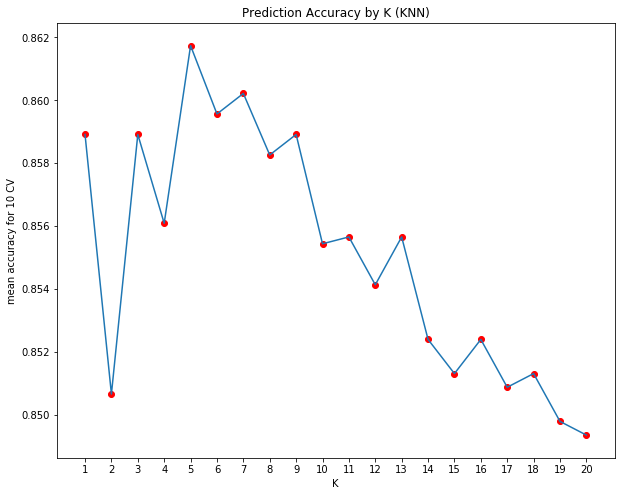

In [82]:
plt.figure(figsize=(10,8))
x_K = np.arange(1,21,1)
y_accuracy = accuracy_data['avg_accuracy'].tolist()
plt.plot(x_K,y_accuracy)
plt.xlabel('K')
plt.ylabel('mean accuracy for 10 CV')
plt.title('Prediction Accuracy by K (KNN)')
plt.scatter(x_K,y_accuracy, c='r')
plt.xticks(x_K)